<a href="https://colab.research.google.com/github/Hifzaan/DataScience_AI/blob/main/Practice_Dimensionality_Reduction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Load iris.csv file into a DataFrame
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']
df = pd.read_csv("/content/drive/MyDrive/Data Science IIT Guwahati/IITG_B05_03_UnSupML/iris.csv", names = names)
print(df.shape)
df.head()

(150, 5)


,sepal-length,sepal-width,petal-length,petal-width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.target.value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
# Standardize the data
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
# Separating out the features
x = df.loc[:,features].values
# Separting out the target
y = df.loc[:,['target']].values

In [12]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [14]:
# Projection of PCA to 2D
df.head()

,sepal-length,sepal-width,petal-length,petal-width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2'])

In [18]:
principalDf.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [19]:
# Concatenating the DataFrame with target feature
FinalDf = pd.concat([principalDf,df[['target']]], axis=1)
FinalDf.head()

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [33]:
print(FinalDf.target.unique())
print(FinalDf.target.value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


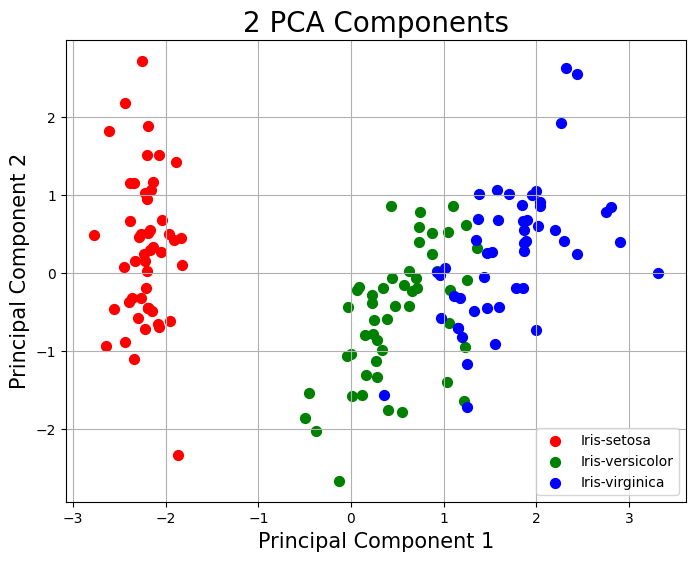

In [38]:
# Visualize 2D projection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 PCA Components', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
  indicesToKeep = FinalDf['target'] == target
  ax.scatter(FinalDf.loc[indicesToKeep, 'PC1'],
             FinalDf.loc[indicesToKeep,'PC2'],
             c=color,
             s=50)
  ax.legend(targets)
  ax.grid()

In [39]:
# Calculating Explained Ratio
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])